## Dicionário de Dados - Ataque Terrorista

- **iyear:** ano em que ocorreu
- **imonth:** mes em que ocorreu           
- **iday:** dia em que ocorreu                  
- **nkill:** numero de óbitos em decorrencia do ataque                 
- **region_txt:** string da região onde ococorreu            
- **country_txt:** string do país onde ocorreu           
- **city:** string da cidade onde ocorreu                  
- **latitude:** latitude do ataque           
- **longitude:** longitude do ataque          
- **extended:** boleano indicando se a duração do ataque ultrapassou 24h             
- **attacktype1_txt:** O método geral de ataque e ampla classe de táticas usadas      
- **weaptype1_txt:** armas utilizadas no ataque         
- **targtype1_txt:** alvos dos ataques         
- **suicide:** boleano ataque suicida               
- **success:** boleando indicando se o ataque foi um sucesso              

In [ ]:
!pip install plotly
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


In [ ]:
import numpy as np

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# gtdDF = pd.read_csv('globalterrorismdb_0718dist.csv', engine='python')
# from google.colab import drive
# drive.mount('/content/drive')
gtdDF = pd.read_csv('drive/MyDrive/code_dojo/week1/notebooks/terrorism/globalterrorismdb_0718dist.csv', engine='python')

In [ ]:
print(list(gtdDF.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [ ]:
gtdDF = gtdDF[['iyear', 'imonth', 'iday','nkill','region_txt', 'country_txt', 'city', 'latitude', 'longitude', 'extended', 'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'suicide', 'success']]
gtdDF.isnull().sum()

iyear                  0
imonth                 0
iday                   0
nkill              10313
region_txt             0
country_txt            0
city                 434
latitude            4556
longitude           4557
extended               0
attacktype1_txt        0
weaptype1_txt          0
targtype1_txt          0
suicide                0
success                0
dtype: int64

In [ ]:
gtdDF.dtypes

iyear                int64
imonth               int64
iday                 int64
nkill              float64
region_txt          object
country_txt         object
city                object
latitude           float64
longitude          float64
extended             int64
attacktype1_txt     object
weaptype1_txt       object
targtype1_txt       object
suicide              int64
success              int64
dtype: object

In [ ]:
gtdDF[(pd.isna(gtdDF['city']))].head(3)
# Seria possivel encontrar a cidade atráves da latitude x longitude, 
# mas pode ser um processo mais trabalhoso e demorado, 
# para fins de experimentos de analise não vale a pena

,iyear,imonth,iday,nkill,region_txt,country_txt,city,latitude,longitude,extended,attacktype1_txt,weaptype1_txt,targtype1_txt,suicide,success
79458,2006,1,19,1.0,Southeast Asia,Thailand,NaN,6.190088,101.797961,0,Armed Assault,Firearms,Private Citizens & Property,0,1
79459,2006,1,19,1.0,Southeast Asia,Thailand,NaN,6.700696,101.433915,0,Armed Assault,Firearms,Private Citizens & Property,0,1
79550,2006,1,24,1.0,Southeast Asia,Thailand,NaN,6.700696,101.433915,0,Armed Assault,Firearms,Government (General),0,1


In [ ]:
gtdDF['city'] = gtdDF['city'].apply(lambda x: 'Unknown' if pd.isna(x) else x)

In [ ]:
def groupbyCustom(df, group, columnTarget):
    newDf = df.groupby(group)[columnTarget].apply(len).reset_index()
    return newDf.rename(columns={columnTarget: 'amount'})

### Alguns dados estatisticos

In [ ]:
attacksYear = groupbyCustom(gtdDF, 'iyear', 'imonth')
attacksYear.head(1)

,iyear,amount
0,1970,651


In [ ]:
print("O dataset contém dados historicos de eventos dos anos {} ate {}".format(
    attacksYear['iyear'].min(), attacksYear['iyear'].max()))

print("Quantidadede total de ataques: {}". format(attacksYear['amount'].sum()))
print("Média anual: {}".format(round(attacksYear['amount'].mean(), 2)))
print("Desvio Padrão: {}".format(round(attacksYear['amount'].std(), 2)))

O dataset contém dados historicos de eventos dos anos 1970 ate 2017
Quantidadede total de ataques: 181691
Média anual: 3865.77
Desvio Padrão: 3836.94


### Distribuição dos Ataques ao longo dos anos

In [ ]:
fig = px.histogram(gtdDF, x="iyear", title='Attacks per year', labels={'iyear': 'Year'})

fig.show()

In [ ]:
len(gtdDF[(gtdDF['iyear'] == 1992)]), len(gtdDF[(gtdDF['iyear'] == 1993)]), len(gtdDF[(gtdDF['iyear'] == 1994)])

(5071, 0, 3456)

In [ ]:
regionKills = gtdDF[['iyear', 'region_txt']].value_counts(normalize=True).reset_index(name='amount').sort_values(by='iyear')
fig = px.line(regionKills, x="iyear", y='amount', title='Attacks per year in each region', labels={'iyear': 'Year'}, color='region_txt')
fig.show()

### Distribuição dos ataques nos meses

In [ ]:
fig = px.histogram(gtdDF, x="imonth", title='Attacks per Month', labels={'imonth':'Months'})
fig.show()

### Distribuição dos ataques nos dias

In [ ]:
fig = px.histogram(gtdDF, x="iday", title='Attacks per day', labels={'iday':'Days'})
fig.show()

### Quantidade de ataques nas regiões e seus países

In [ ]:
countryTree = groupbyCustom(gtdDF, ['region_txt', 'country_txt', 'city'], 'iyear')

In [ ]:
totalAttacks = countryTree['amount'].sum()

print("Porcentagem de ataques por grandes regiões\n")
for region in countryTree['region_txt'].unique():
    regionAttacks = countryTree[(countryTree['region_txt'] == region)]['amount'].sum()
    print("Mortes na regiao \'{}': {:.2f}%".format(region, (regionAttacks / totalAttacks) *100 ))

Porcentagem de ataques por grandes regiões

Mortes na regiao 'Australasia & Oceania': 0.16%
Mortes na regiao 'Central America & Caribbean': 5.69%
Mortes na regiao 'Central Asia': 0.31%
Mortes na regiao 'East Asia': 0.44%
Mortes na regiao 'Eastern Europe': 2.83%
Mortes na regiao 'Middle East & North Africa': 27.78%
Mortes na regiao 'North America': 1.90%
Mortes na regiao 'South America': 10.45%
Mortes na regiao 'South Asia': 24.75%
Mortes na regiao 'Southeast Asia': 6.87%
Mortes na regiao 'Sub-Saharan Africa': 9.66%
Mortes na regiao 'Western Europe': 9.16%


In [ ]:
fig = px.treemap(countryTree, path=[px.Constant("World"), 'region_txt', 'country_txt'], values='amount')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Países e as cidades que sofreram mais ataques

Grandes Regiões para escolha:

- Australasia & Oceania

- Central America & Caribbean

- Central Asia

- East Asia

- Eastern Europe

- Middle East & North Africa

- North America

- South America

- South Asia

- Southeast Asia

- Sub-Saharan Africa

- Western Europe

**Escala do Mapa:** world, usa, europe, asia, africa, north america, south america


In [ ]:
greatArea = 'South America'
scope = 'south america'

# fig = px.treemap(countryTree[(countryTree['region_txt'] == greatArea)], path=[px.Constant(greatArea), 'country_txt' ,'city'], values='amount')
# fig.update_traces(root_color="lightgrey")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

globalMap =  groupbyCustom(gtdDF, ['region_txt', 'country_txt', 'city', 'latitude', 'longitude'], 'iyear')


fig = px.scatter_geo(globalMap[(globalMap['region_txt'] == greatArea)],
                    lat='latitude',
                    lon='longitude',
                    hover_name="city",
                    color='country_txt')
                    #text='amount')

fig.update_layout(
        title = 'Attacks on countries and their cities',
        geo_scope=scope
    )


fig.show()

### Duração dos ataques

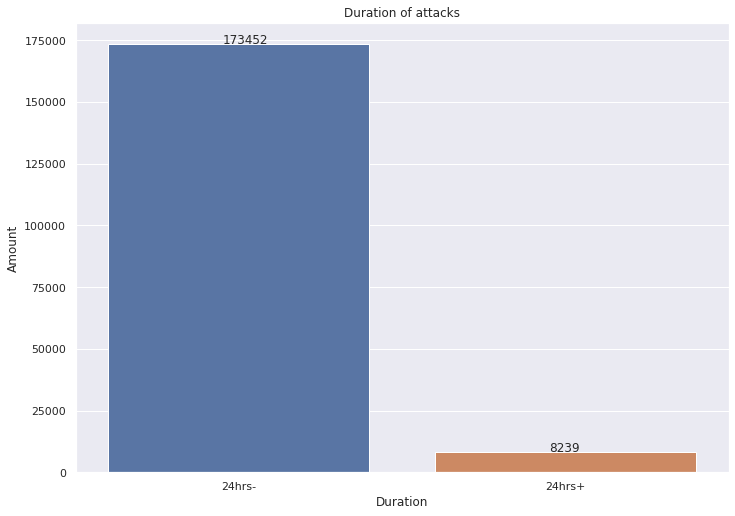

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='extended', data=gtdDF['extended'].apply(lambda x: '24hrs+' if x==1 else '24hrs-').reset_index())
ax.set(title='Duration of attacks', ylabel='Amount', xlabel='Duration')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))

In [ ]:
extendedAttacks = gtdDF[['iyear', 'extended']].value_counts(normalize=True).reset_index(name='amount').sort_values(by='iyear')
fig = px.line(extendedAttacks, x="iyear", y='amount', title='24-hour attacks', 
              labels={'iyear': 'Year', 'extended': 'Duration'}, 
              color='extended')
fig.show()

### Regioes e Paises com ataques de 24h+

In [ ]:
extended = groupbyCustom(gtdDF[(gtdDF['extended'] == 1)], ['region_txt', 'country_txt', 'city', 'iyear'], 'imonth')

In [ ]:
fig = px.treemap(extended, path=[px.Constant("World"), 'region_txt', 'country_txt', 'iyear'], values='amount')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Quantidade de ataques / mortes por ataque

In [ ]:
gtdDF['nkill'].fillna(0, inplace=True)
attacksDeaths = gtdDF[['iyear', 'nkill']]
attacksDeaths.loc[:,'attacks'] = 1
attacksDeaths.loc[:, 'nkill'] = attacksDeaths.loc[:, 'nkill'].astype('int64', copy=False)

In [ ]:
atkCount = attacksDeaths['attacks'].sum()
killSum = attacksDeaths['nkill'].sum()
print('Quantidade total de ataques na historia: {}'.format(atkCount))
print('Quantidade total de mortos em ataques: {}'.format(killSum))
print('A cada ataque morre {:2.2f} pessoas em média'.format(killSum/atkCount))

Quantidade total de ataques na historia: 181691
Quantidade total de mortos em ataques: 411868
A cada ataque morre 2.27 pessoas em média


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=attacksDeaths['attacks'], x=attacksDeaths['iyear'], name="attacks(count)"))
fig.add_trace(go.Histogram(histfunc="sum", y=attacksDeaths['nkill'], x=attacksDeaths['iyear'], name="kills(sum)"))
# fig.update_layout(barmode='stack', title='Quantidade de mortos / Ataques')
fig.update_layout(title='Number of attacks/kills')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Armas mais utilizadas nos ataques

In [ ]:
gtdDF['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [ ]:
gtdDF['weaptype1_txt'] = gtdDF['weaptype1_txt'].apply(lambda x: 'vehicle' if 'vehicle' in x else x)

In [ ]:
mostUsedWeapons = gtdDF['weaptype1_txt'].value_counts(normalize=True).reset_index(name='weapon')
fig = px.bar(mostUsedWeapons, x='index', y='weapon', title='Most used weapons')
fig.show()

### Quantidade de mortes por arma

In [ ]:
weaponsDeath = gtdDF.groupby(['iyear', 'weaptype1_txt', 'region_txt'])['nkill'].sum().reset_index()

In [ ]:
totalKills = weaponsDeath['nkill'].sum()

print("Quantidade de Armas diferentes utilizadas nos ataques {}".format(len(weaponsDeath['weaptype1_txt'].unique())))
print("Quantidade de pessoas mortas nos ataques: {}\n". format(totalKills))

for gun in weaponsDeath['weaptype1_txt'].unique():
    killedByGun = weaponsDeath[(weaponsDeath['weaptype1_txt'] == gun)]['nkill'].sum()
    print("Mortes por arma \'{}': {:.2f}%".format(gun, (killedByGun / totalKills)*100 ))

Quantidade de Armas diferentes utilizadas nos ataques 12
Quantidade de pessoas mortas nos ataques: 411868.0

Mortes por arma 'Chemical': 0.15%
Mortes por arma 'Explosives': 42.31%
Mortes por arma 'Firearms': 42.46%
Mortes por arma 'Incendiary': 1.33%
Mortes por arma 'Melee': 2.57%
Mortes por arma 'Sabotage Equipment': 0.02%
Mortes por arma 'Unknown': 10.35%
Mortes por arma 'vehicle': 0.77%
Mortes por arma 'Fake Weapons': 0.00%
Mortes por arma 'Radiological': 0.00%
Mortes por arma 'Other': 0.03%
Mortes por arma 'Biological': 0.00%


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", x=gtdDF['weaptype1_txt'], name="weapons/attacks"))
fig.add_trace(go.Histogram(histfunc="sum", x=weaponsDeath['weaptype1_txt'], y=weaponsDeath['nkill'], name="kills/weapons"))
fig.update_layout(title='Number of attacks/kills')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Mortes por arma em cada regiao

In [ ]:
fig = px.treemap(weaponsDeath, path=[px.Constant("Weapons used"), 'region_txt', 'weaptype1_txt'], title= 'Deaths per weapon type', values='nkill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Tipos de ataques

In [ ]:
fig = px.bar(gtdDF['attacktype1_txt'].value_counts(normalize=True).reset_index(), x='index', y='attacktype1_txt')
fig.show()

In [ ]:
atkTypeYear = gtdDF[['iyear', 'attacktype1_txt']].value_counts(normalize=True).reset_index(name='amount').sort_values(by='iyear')
fig = px.line(atkTypeYear, x="iyear", y='amount', title='Attack type per year', labels={'iyear': 'Year', 'attacktype1_txt': 'Attack Type' }, color='attacktype1_txt')
fig.show()

In [ ]:
fig = px.bar(gtdDF['targtype1_txt'].value_counts(normalize=True).reset_index(), x='index', y='targtype1_txt', title='Most Common targets')
fig.show()

In [ ]:
atkTargetYear = gtdDF[['iyear', 'targtype1_txt']].value_counts(normalize=True).reset_index(name='amount').sort_values(by='iyear')
fig = px.line(atkTargetYear, x="iyear", y='amount', title='Target type per year', labels={'iyear': 'Year', 'targtype1_txt': 'Target Type' }, color='targtype1_txt')
fig.show()

In [ ]:
fig = px.bar(gtdDF['success'].value_counts(normalize=True).reset_index(), x='index', y='success')
fig.show()

In [ ]:
succAtks = gtdDF[['iyear', 'success']].value_counts(normalize=True).reset_index(name='amount').sort_values(by='iyear')
fig = px.line(succAtks, x="iyear", y='amount', title='Attacks Successfull per year', labels={'iyear': 'Year', 'success': 'Successfull' }, color='success')
fig.show()

In [ ]:
fig = px.bar(gtdDF['suicide'].value_counts(normalize=True).reset_index(), x='index', y='suicide', title='Proportion of suicide attacks',labels={'index': 'attack type'})
fig.show()

In [ ]:
suicide = gtdDF[['iyear', 'suicide']].value_counts(normalize=True).reset_index(name='amount').sort_values(by='iyear')
fig = px.line(suicide, x="iyear", y='amount', title='Suicide Attacks per year', labels={'iyear': 'Year'}, color='suicide')
fig.show()

### Parallel Cordinates

In [ ]:
gtdDF.head()

,iyear,imonth,iday,nkill,region_txt,country_txt,city,latitude,longitude,extended,attacktype1_txt,weaptype1_txt,targtype1_txt,suicide,success
0,1970,7,2,1.0,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,0,Assassination,Unknown,Private Citizens & Property,0,1
1,1970,0,0,0.0,North America,Mexico,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),0,1
2,1970,1,0,1.0,Southeast Asia,Philippines,Unknown,15.478598,120.599741,0,Assassination,Unknown,Journalists & Media,0,1
3,1970,1,0,0.0,Western Europe,Greece,Athens,37.997490,23.762728,0,Bombing/Explosion,Explosives,Government (Diplomatic),0,1
4,1970,1,0,0.0,East Asia,Japan,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),0,1


In [ ]:
encoders = []
idx = 0
for column in gtdDF:
  if gtdDF[column].dtype == object:
    encoders.append(preprocessing.LabelEncoder())
    gtdDF[column] = encoders[idx].fit_transform(gtdDF[column].values)
    idx+=1

In [ ]:
gtdDF.head()

,iyear,imonth,iday,nkill,region_txt,country_txt,city,latitude,longitude,extended,attacktype1_txt,weaptype1_txt,targtype1_txt,suicide,success
0,1970,7,2,1.0,1,47,29806,18.456792,-69.951164,0,1,10,13,0,1
1,1970,0,0,0.0,6,116,22166,19.371887,-99.086624,0,6,10,5,0,1
2,1970,1,0,1.0,9,140,34517,15.478598,120.599741,0,1,10,7,0,1
3,1970,1,0,0.0,11,68,2513,37.997490,23.762728,0,2,2,5,0,1
4,1970,1,0,0.0,3,90,11264,33.580412,130.396361,0,3,5,5,0,1


In [ ]:
corrParallel = gtdDF.drop(columns=['latitude','longitude','iyear','imonth', 'iday'])

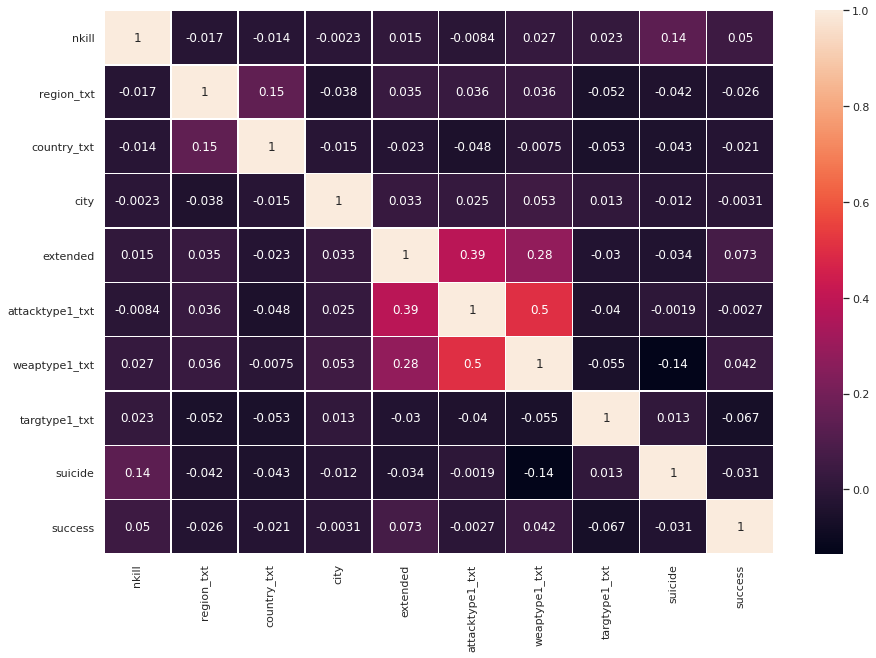

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corrParallel.corr(), annot=True, linewidths=.5)

In [ ]:
fig = px.parallel_coordinates(corrParallel, color="nkill",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

Output hidden; open in https://colab.research.google.com to view.